<a href="https://colab.research.google.com/github/MiekeNap/DataAnalytics_Income-inequality/blob/main/Income_inequality_in_relation_to_GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment - Income inequality in relation to GDP
For this assignment you need to answer the following question:

Is there a relation between a country's Gross Domestrict Product (GDP) and its income inequality?

**Conclusion**

It seems there is a relation between GDP and Gini.  
However, for some countries only data was available from only very few years, giving more extreme results (close to +1 or -1, for example Congo and Comores), so for these countries it is difficult to say if and how the GDP and Gini are related.  The countries with data from many years, are probably more reliable (for example, Netherlands and United States).

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [31]:
gini = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/economic-inequality-gini-index.csv')
display(gini)

Entity Code  Year  Gini coefficient
0      Albania  ALB  1996          0.270103
1      Albania  ALB  2002          0.317390
2      Albania  ALB  2005          0.305957
3      Albania  ALB  2008          0.299847
4      Albania  ALB  2012          0.289605
...        ...  ...   ...               ...
2120    Zambia  ZMB  2010          0.556215
2121    Zambia  ZMB  2015          0.571361
2122  Zimbabwe  ZWE  2011          0.431536
2123  Zimbabwe  ZWE  2017          0.443371
2124  Zimbabwe  ZWE  2019          0.502565

[2125 rows x 4 columns]

In [32]:
gdp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gdp-per-capita-maddison-2020.csv')
display(gdp)

Entity Code  Year  GDP per capita 417485-annotations
0      Afghanistan  AFG  1950     1156.000000                NaN
1      Afghanistan  AFG  1951     1170.000000                NaN
2      Afghanistan  AFG  1952     1189.000000                NaN
3      Afghanistan  AFG  1953     1240.000000                NaN
4      Afghanistan  AFG  1954     1245.000000                NaN
...            ...  ...   ...             ...                ...
19871     Zimbabwe  ZWE  2014     1594.000000                NaN
19872     Zimbabwe  ZWE  2015     1560.000000                NaN
19873     Zimbabwe  ZWE  2016     1534.000000                NaN
19874     Zimbabwe  ZWE  2017     1582.366211                NaN
19875     Zimbabwe  ZWE  2018     1611.405151                NaN

[19876 rows x 5 columns]

In [33]:
gdp_gini = pd.merge(gini, gdp)
gdp_gini

Entity Code  Year  Gini coefficient  GDP per capita 417485-annotations
0      Albania  ALB  1996          0.270103     3965.685303                NaN
1      Albania  ALB  2002          0.317390     5608.962402                NaN
2      Albania  ALB  2005          0.305957     6858.466797                NaN
3      Albania  ALB  2008          0.299847     8522.129883                NaN
4      Albania  ALB  2012          0.289605     9592.000000                NaN
...        ...  ...   ...               ...             ...                ...
1805    Zambia  ZMB  2006          0.546175     2133.593994                NaN
1806    Zambia  ZMB  2010          0.556215     3032.067871                NaN
1807    Zambia  ZMB  2015          0.571361     3478.000000                NaN
1808  Zimbabwe  ZWE  2011          0.431536     1515.000000                NaN
1809  Zimbabwe  ZWE  2017          0.443371     1582.366211                NaN

[1810 rows x 6 columns]

In [118]:
gdp_gini.columns
gdp_gini.drop(columns=['Code','417485-annotations'], inplace=True)
gdp_gini

# including a column where the number of datapoints are calculated. 
# I am assuming that a country with data over many years may give a more meaningful result 
# than a country with data from only two years for example.

gdp_gini['Entitycount'] = gdp_gini.groupby('Entity')['Entity'].transform('count')
gdp_gini

Entity  Year  Gini coefficient  GDP per capita  Entitycount
0      Albania  1996          0.270103     3965.685303           10
1      Albania  2002          0.317390     5608.962402           10
2      Albania  2005          0.305957     6858.466797           10
3      Albania  2008          0.299847     8522.129883           10
4      Albania  2012          0.289605     9592.000000           10
...        ...   ...               ...             ...          ...
1805    Zambia  2006          0.546175     2133.593994            9
1806    Zambia  2010          0.556215     3032.067871            9
1807    Zambia  2015          0.571361     3478.000000            9
1808  Zimbabwe  2011          0.431536     1515.000000            2
1809  Zimbabwe  2017          0.443371     1582.366211            2

[1810 rows x 5 columns]

In [119]:
# calulate the correlation coefficient between Gini and GDP per country
correlation = gdp_gini.groupby('Entity')[['Gini coefficient', 'GDP per capita']].corr().unstack().iloc[:,1].reset_index() 
correlation.columns
correlation.columns = ['Entity', 'Correlation']
correlation

Entity  Correlation
0      Albania     0.567214
1      Algeria    -0.934937
2       Angola    -0.409606
3      Armenia    -0.583625
4    Australia     0.819584
..         ...          ...
142  Venezuela     0.090274
143    Vietnam    -0.141560
144      Yemen    -0.587702
145     Zambia     0.392477
146   Zimbabwe     1.000000

[147 rows x 2 columns]

In [120]:
gdp_gini_corr = pd.merge(gdp_gini, correlation)
gdp_gini_corr.columns
gdp_gini_corr.columns = ['Entity', 'Year', 'Gini', 'GDP', 'Entitycount', 'Correlation']
gdp_gini_corr.head()

Entity  Year      Gini          GDP  Entitycount  Correlation
0  Albania  1996  0.270103  3965.685303           10     0.567214
1  Albania  2002  0.317390  5608.962402           10     0.567214
2  Albania  2005  0.305957  6858.466797           10     0.567214
3  Albania  2008  0.299847  8522.129883           10     0.567214
4  Albania  2012  0.289605  9592.000000           10     0.567214

In [123]:
# Sorted table per country, only keeping the lines with the maximum GDP per country
by_country = gdp_gini_corr.groupby('Entity').apply(lambda x: x.loc[x.GDP.idxmax(),['Year', 'Gini', 'GDP', 'Entitycount', 'Correlation']]).reset_index()
by_country

Entity  Year      Gini           GDP  Entitycount  Correlation
0      Albania  2018  0.301483  11104.166016           10     0.567214
1      Algeria  2011  0.276157  13204.000000            3    -0.934937
2       Angola  2018  0.512721   7771.441895            3    -0.409606
3      Armenia  2018  0.344335  11454.424805           20    -0.583625
4    Australia  2018  0.343338  49830.800781           12     0.819584
..         ...   ...       ...           ...          ...          ...
142  Venezuela  2006  0.447705  16253.685547           13     0.090274
143    Vietnam  2018  0.357155   6814.142090           11    -0.141560
144      Yemen  2005  0.347323   4485.583008            3    -0.587702
145     Zambia  2015  0.571361   3478.000000            9     0.392477
146   Zimbabwe  2017  0.443371   1582.366211            2     1.000000

[147 rows x 6 columns]

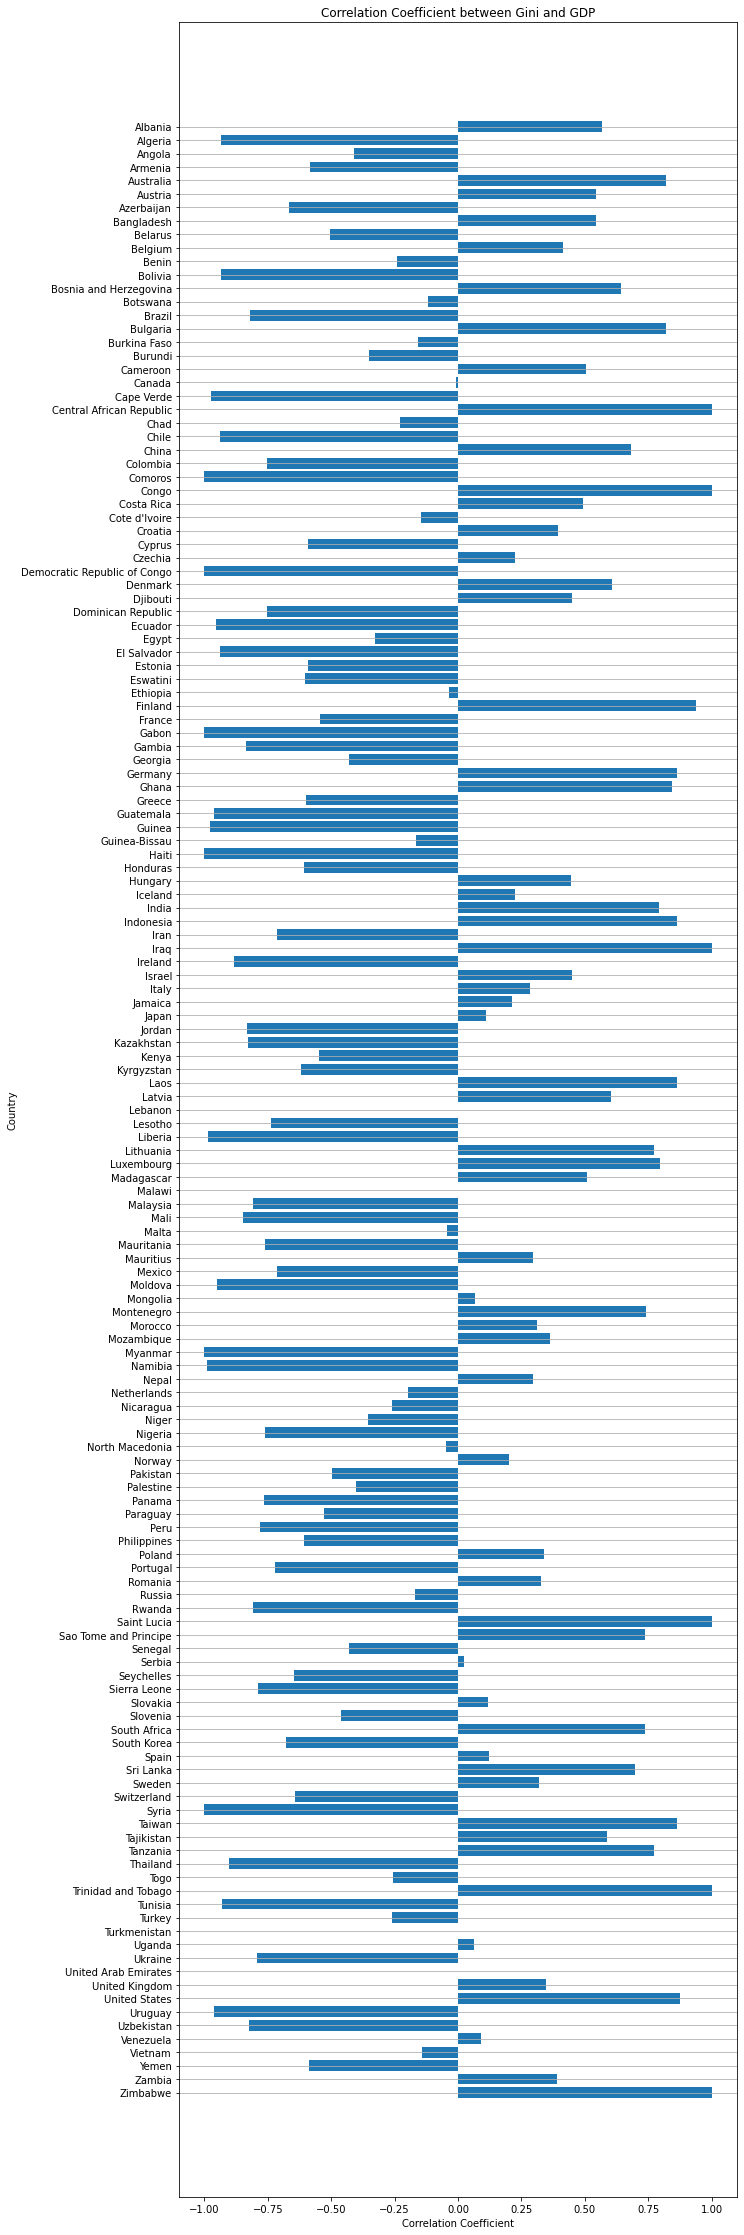

In [124]:
fig, ax = plt.subplots()

correlation = by_country['Correlation']
country = by_country['Entity']

plt.barh(country, correlation)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Country')
ax.invert_yaxis()
plt.title('Correlation Coefficient between Gini and GDP')
plt.grid(True, axis='y')
fig.set_size_inches(10,40)
plt.show()